In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
# parameters

target_data_name = 'UCSDped2'
#target_data_name = 'SUrveillance'
#target_data_name = 'UCSDped1'
#target_data_name = 'ShangaiTech'

In [3]:
# Read Meta data 
data_meta = pd.read_csv('./output/' + target_data_name + '/meta_data.csv')
abnormality_threshold = 0.25

In [4]:
# plot distribution
data_meta['new_label'] = data_meta['label']
data_meta.loc[data_meta['label'] < abnormality_threshold, 'new_label'] = -1
data_meta.loc[data_meta['label'] >= abnormality_threshold, 'new_label'] = 1

# get data
data_meta_train = data_meta[data_meta['train_valid_test'] == 'train']
data_meta_valid = data_meta[data_meta['train_valid_test'] == 'valid']
data_meta_test = data_meta[data_meta['train_valid_test'] == 'test']

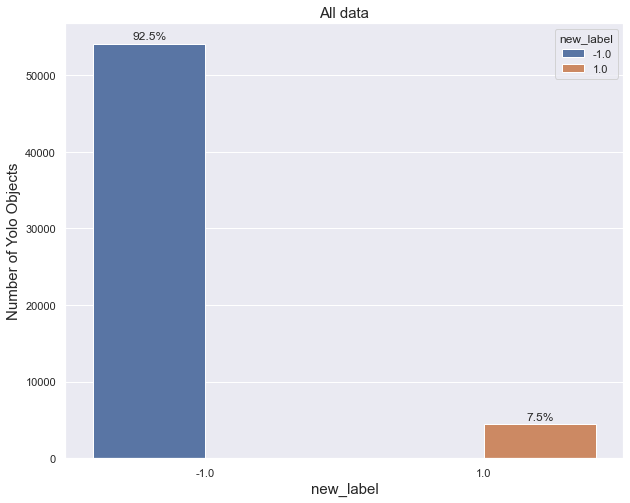

In [5]:
total = float(len(data_meta))
plt.figure(figsize=(10,8))
ax = sns.countplot(x="new_label", hue="new_label", data=data_meta)
ax.set_title('All data', fontsize=15)
ax.set_ylabel('Number of Yolo Objects', fontsize=15)
ax.set_xlabel('new_label', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + total*0.01
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

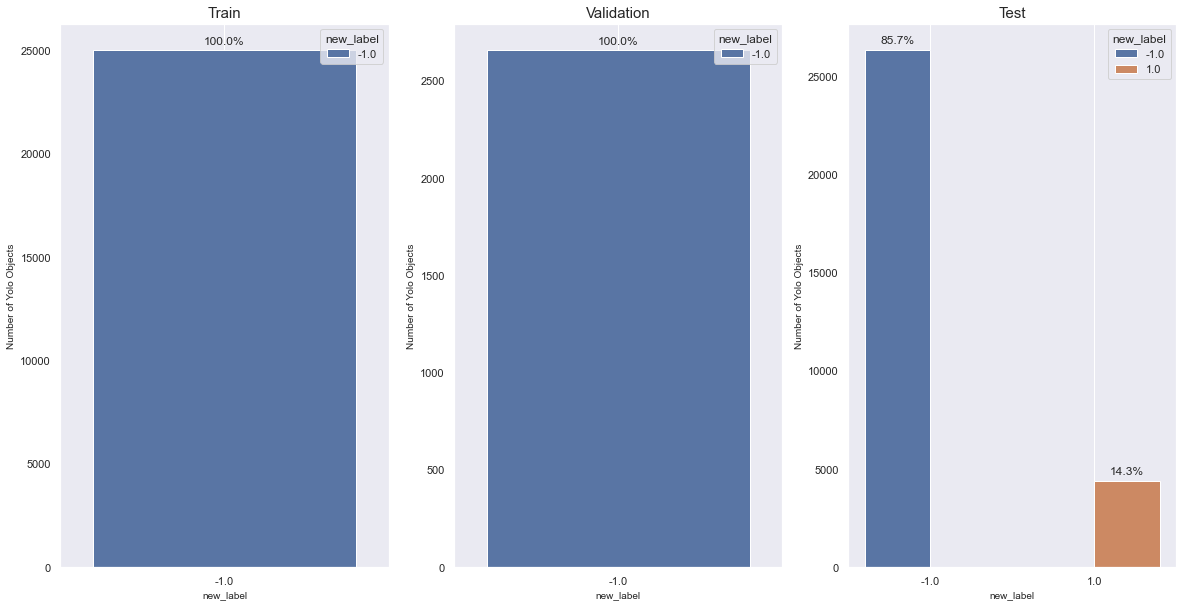

In [6]:
total = float(len(data_meta))
total_train = float(len(data_meta_train))
total_valid = float(len(data_meta_valid))
total_test = float(len(data_meta_test))
f,ax = plt.subplots(1,3, figsize=(20,10))

sns.countplot(x="new_label", hue="new_label", data=data_meta_train, ax=ax[0])
ax[0].set_title('Train', fontsize=15)
ax[0].set_ylabel('Number of Yolo Objects', fontsize=10)
ax[0].set_xlabel('new_label', fontsize=10)
for p in ax[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_train)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + total_train*0.01
    ax[0].annotate(percentage, (x, y), ha='center')
ax[0].grid()

sns.countplot(x="new_label", hue="new_label", data=data_meta_valid, ax=ax[1])
ax[1].set_title('Validation', fontsize=15)
ax[1].set_ylabel('Number of Yolo Objects', fontsize=10)
ax[1].set_xlabel('new_label', fontsize=10)
for p in ax[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_valid)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + total_valid*0.01
    ax[1].annotate(percentage, (x, y), ha='center')
ax[1].grid()

sns.countplot(x="new_label", hue="new_label", data=data_meta_test, ax=ax[2])
ax[2].set_title('Test', fontsize=15)
ax[2].set_ylabel('Number of Yolo Objects', fontsize=10)
ax[2].set_xlabel('new_label', fontsize=10)
for p in ax[2].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_test)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + total_test*0.01
    ax[2].annotate(percentage, (x, y), ha='center')
ax[2].grid()